# ***Libraries***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [2]:
totyota=pd.read_csv("ToyotaCorolla.csv", encoding="unicode_escape")

In [3]:

totyota= totyota.drop("Id", axis=1)
totyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [4]:
totyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [5]:
corolla=totyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
corolla.duplicated().sum()
#one Duplicate entry found and removed it too.

1

In [9]:
corolla=corolla.drop_duplicates()

In [10]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [11]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


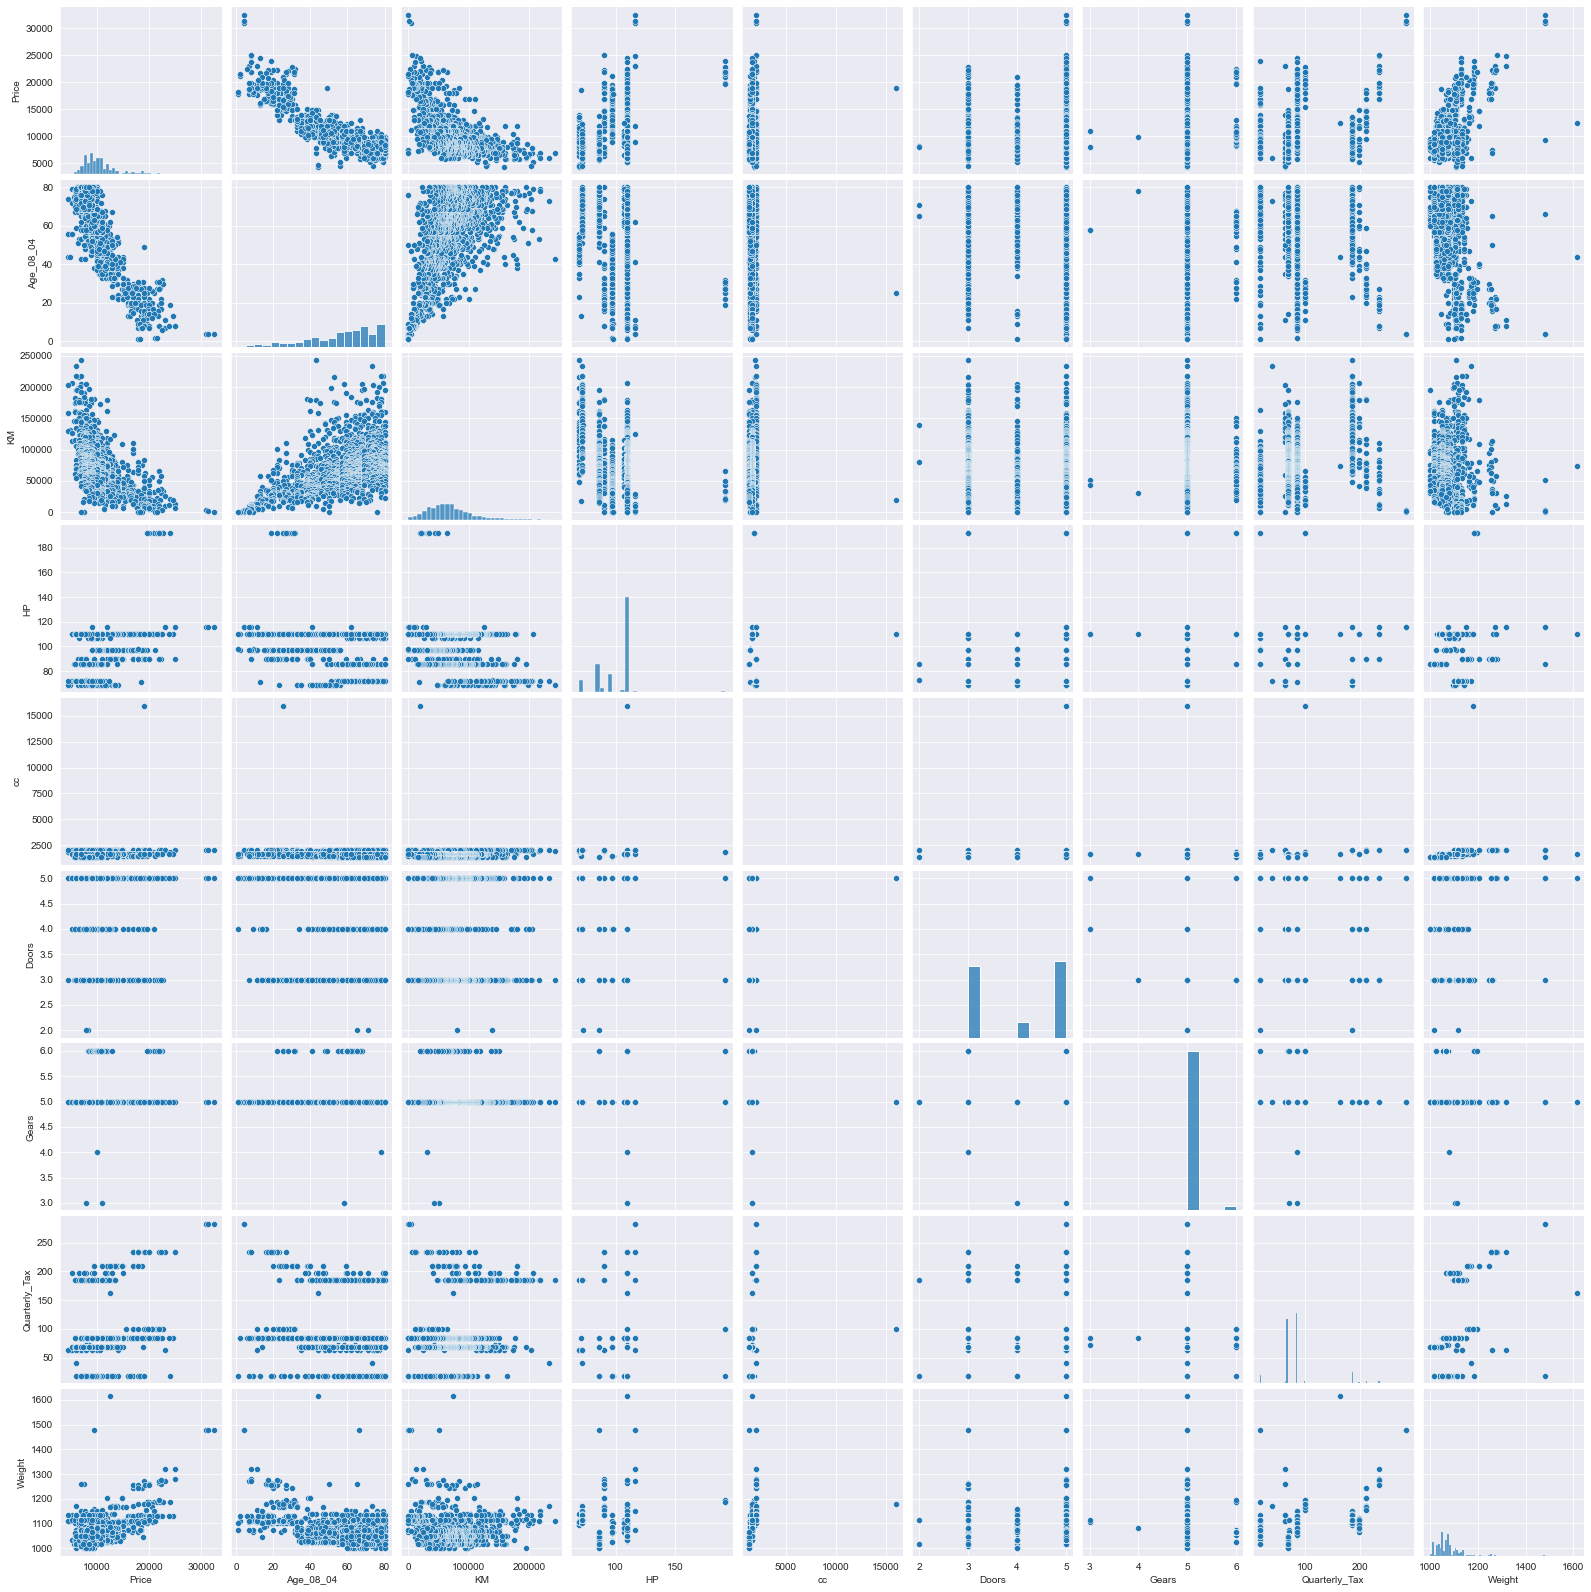

In [12]:
sns.set_style(style="darkgrid")
sns.pairplot(corolla)

In [13]:
corolla.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


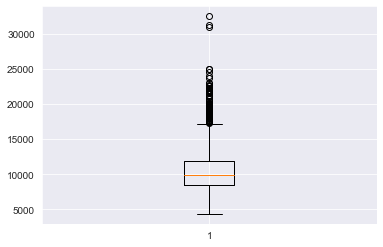

In [14]:
price_boxplot=plt.boxplot(corolla["Price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c07e057340>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07e057a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c07e048f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07e0631c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07e063550>],
 'means': []}

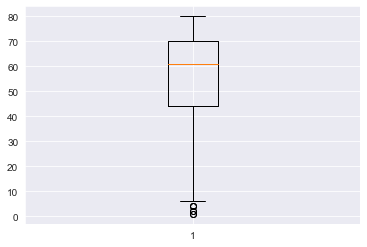

In [15]:
plt.boxplot(corolla["Age_08_04"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c07e0bf640>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07e0bfd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c07e0bf2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07e0cb4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07e0cb850>],
 'means': []}

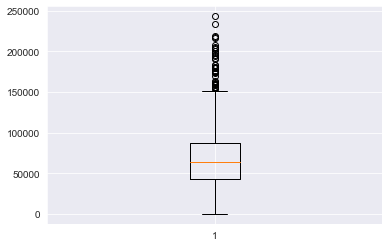

In [16]:
plt.boxplot(corolla["KM"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c07e118d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07e126490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c07e1189a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07e126bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07e126f40>],
 'means': []}

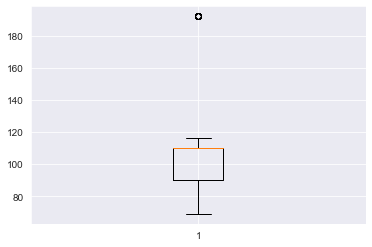

In [17]:
plt.boxplot(corolla["HP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c07e1814c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07e181be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c07e181130>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07e18b340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07e18b6d0>],
 'means': []}

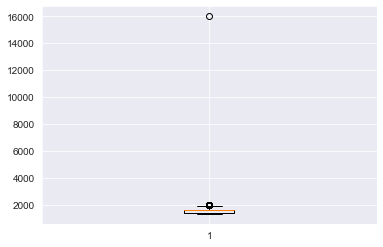

In [18]:
plt.boxplot(corolla["cc"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc', ylabel='Density'>

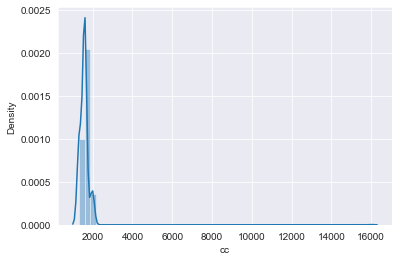

In [19]:
sns.distplot(corolla["cc"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cc'>

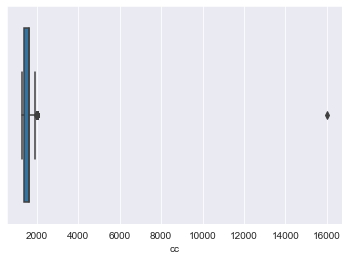

In [20]:
sns.boxplot(corolla["cc"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c07e357ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07e363400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c07e357910>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07e363b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07e363eb0>],
 'means': []}

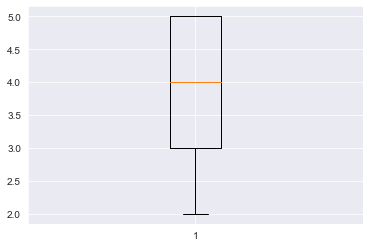

In [21]:
plt.boxplot(corolla["Doors"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Doors', ylabel='Density'>

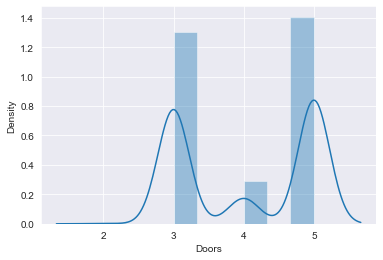

In [22]:
sns.distplot(corolla["Doors"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c07e435970>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07e4450d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c07e4355e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07e4457f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07e445b80>],
 'means': []}

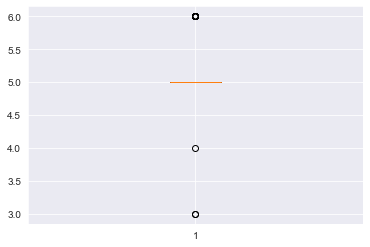

In [23]:
plt.boxplot(corolla["Gears"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1c07e4a3640>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07e4a3d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c07e4a32b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07e4af4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07e4af850>],
 'means': []}

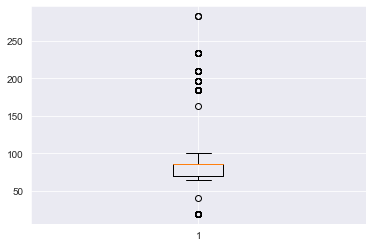

In [24]:
plt.boxplot(corolla["Quarterly_Tax"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c07e503820>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07e503f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c07e503490>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07e50e6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07e50ea30>],
 'means': []}

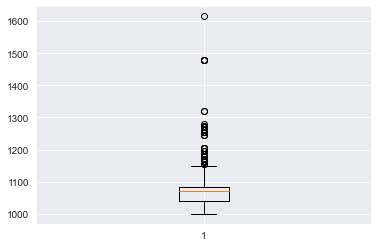

In [25]:
plt.boxplot(corolla["Weight"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

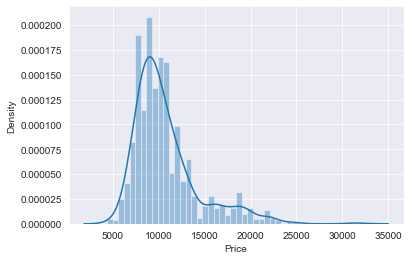

In [26]:
sns.distplot(corolla["Price"])

Dataset has Outliers standardizing the data to have clear understanding

In [27]:
from sklearn.preprocessing import StandardScaler
standardization=StandardScaler()

In [28]:
corrolla_standar=standardization.fit_transform(corolla)

In [29]:
corolla.head(1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165


In [30]:
numvars=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]

In [31]:
corrolla_standar=pd.DataFrame(corrolla_standar, columns=(numvars))

In [32]:
corrolla_standar.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964


{'whiskers': [<matplotlib.lines.Line2D at 0x1c07e77cb50>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07e78a2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c07e77c7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07e78a9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07e78ad60>],
 'means': []}

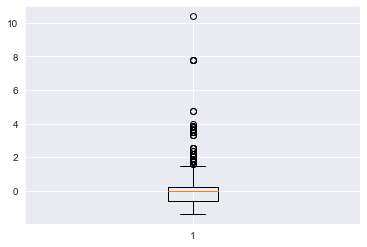

In [33]:
plt.boxplot(corrolla_standar["Weight"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

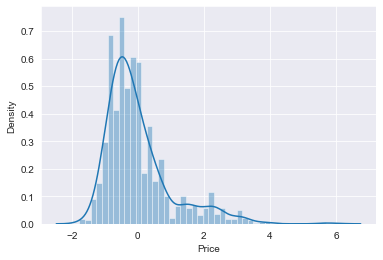

In [34]:
sns.distplot(corrolla_standar["Price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c07e8b1430>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07e8b1b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c07e8b10a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1c07e8bc2b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c07e8bc640>,
 'means': []}

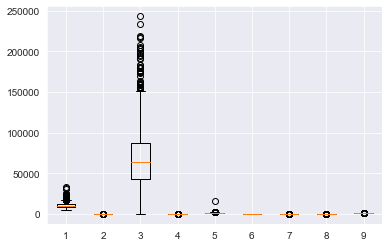

In [35]:
plt.boxplot(corolla)

In [36]:
corolla.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [37]:
import pandas_profiling as pp
import sweetviz as sv


In [38]:
"""sweet_report = sv.analyze(corolla)
sweet_report.show_html('corolla.html')"""

"sweet_report = sv.analyze(corolla)\nsweet_report.show_html('corolla.html')"

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc', ylabel='Density'>

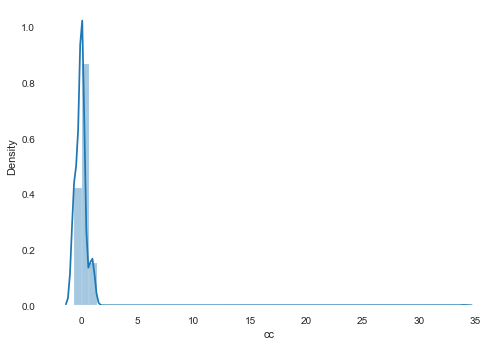

In [39]:
sns.distplot(corrolla_standar["cc"])

In [40]:
corrolla_standar.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1.435000e+03,1.435000e+03,1.435000e+03,1.435000e+03,1.435000e+03,1.435000e+03,1.435000e+03,1.435000e+03,1.435000e+03
mean,-3.961214e-17,-2.376728e-16,1.188364e-16,-1.237879e-16,1.386425e-16,2.277698e-16,-2.155148e-15,-1.980607e-17,-5.941821e-16
std,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00
min,-1.766032e+00,-2.962815e+00,-1.829626e+00,-2.169577e+00,-6.518980e-01,-2.134494e+00,-1.075004e+01,-1.661245e+00,-1.383918e+00
25%,-6.295028e-01,-6.456102e-01,-6.823140e-01,-7.673506e-01,-4.161822e-01,-1.084443e+00,-1.404751e-01,-4.401043e-01,-6.181282e-01
50%,-2.275596e-01,2.704939e-01,-1.366343e-01,5.681028e-01,5.524949e-02,-3.439192e-02,-1.404751e-01,-4.933920e-02,-4.378608e-02
75%,3.407048e-01,7.554902e-01,4.928145e-01,5.681028e-01,5.524949e-02,1.015659e+00,-1.404751e-01,-4.933920e-02,2.433850e-01
max,6.037209e+00,1.294375e+00,4.654146e+00,6.043462e+00,3.399833e+01,1.015659e+00,5.164307e+00,4.786379e+00,1.039010e+01


In [41]:
[item.get_ydata()for item in price_boxplot["fliers"]]

[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 32500, 31000, 31275, 24950, 22950, 24990,
        21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750, 17950,
        18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500, 24500,
        19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900, 19750,
        19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950, 20950,
        20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950, 18950,
        19950, 21950, 22500, 18500, 18700, 21125, 21500, 17795, 18245,
        18950], dtype=int64)]

In [42]:
[item.get_ydata()[1] for item in price_boxplot['whiskers']]

[4350.0, 17200.0]

In [43]:
corrolla_new=corolla.drop(corolla[corolla["Price"]<17200].index, inplace=True)
corrolla_new

In [44]:
np.where(corolla[corolla['Price']>17200])

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   3,   3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,
          4,   4,   4,   4,   4,   4,   5,   5,   5,   5,   5,   5,   5,
          5,   5,   6,   6,   6,   6,   6,   6,   6,   6,   6,   7,   7,
          7,   7,   7,   7,   7,   7,   7,   8,   8,   8,   8,   8,   8,
          8,   8,   8,   9,   9,   9,   9,   9,   9,   9,   9,   9,  10,
         10,  10,  10,  10,  10,  10,  10,  10,  11,  11,  11,  11,  11,
         11,  11,  11,  11,  12,  12,  12,  12,  12,  12,  12,  12,  12,
         13,  13,  13,  13,  13,  13,  13,  13,  13,  14,  14,  14,  14,
         14,  14,  14,  14,  14,  15,  15,  15,  15,  15,  15,  15,  15,
         15,  16,  16,  16,  16,  16,  16,  16,  16,  16,  17,  17,  17,
         17,  17,  17,  17,  17,  17,  18,  18,  18,  18,  18,  18,  18,
         18,  18,  19,  19,  19,  19,  19,  19,  19

In [45]:
corolla.shape

(110, 9)